In [33]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
import pyabeles as pa
%matplotlib inline
np.random.seed(12345)

Jason gave me some data, let's see how well I can fit it. First, let's load in the data and normalize it.

In [34]:
data = np.genfromtxt('Miro data.csv',delimiter=',',skip_header=64)
x = data[:,0]
y = data[:,1]
scale = y[0]


#Normalizing the counts
for i in range(0,len(y)):
    y[i] /= scale
    x[i] /= 2

Now let's construct a basic surface that we think it could be. We will put in the bulk densities as our guess

In [25]:
struct = pa.Surface()
STO = pa.Layer(0.,5.246,sigma=0.26,name="STO")
LSMO = pa.Layer(0.,6.6, sigma=5.85, name="LSMO")
struct.addLayer(LSMO)
struct.addLayer(STO)
exp = struct.doExperiment(x) #Generate an experiment object from the structure. 
exp.theory = y

In [26]:
old = exp.get_params_list()

In [27]:
model = pa.Fitter(exp,method="de",cutoff_begin=5)

In [35]:
model.bounds_from_guess()
model.set_bound(8,(0.1,10.)) #Custom sigma bounds
model.set_bound(9,(0.1,10.))
model.set_bound(4,(100,400))

print model.bounds

[(0.75, 1.25), (0.0, 1.9999999999999999e-06), (-0.20000000000000001, 0.20000000000000001), (0.1, 5), (100, 400), (0.0, 0.0), (4.7896608666233087, 7.9827681110388484), (4.3960466203023376, 7.3267443671705621), (0.1, 10.0), (0.1, 10.0)]


737.69421363
[0.96070675409318596, 1.160454949661571e-06, -0.056050850106395773, 3.1821381541157954, 308.92230574974803, 0.0, 7.5712572174471573, 6.9434369423950413, 4.9553975566981112, 0.39075671853502908]


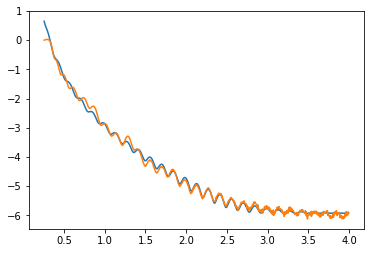

In [36]:
surf = model.fit()
mhm = exp.genTheory(modify=False)
plt.plot(x[0:],np.log10(mhm[0:]))
plt.plot(x[0:],np.log10(y[0:]))
print model.error(exp.get_params_list())
new = exp.get_params_list()
print new

In [ ]:
print old
print new